In [ ]:
!git clone https://github.com/garima-mahato/ERA_V1.git

Cloning into 'ERA_V1'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 152 (delta 68), reused 78 (delta 21), pack-reused 0
Receiving objects: 100% (152/152), 2.40 MiB | 15.08 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [ ]:
from ERA_V1.Session7_InDepthCodingPractice import *

CODE BLOCK: 2

In [ ]:
# # CUDA?

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

device = set_device()

CUDA Available? True


CODE BLOCK: 3

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    #transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    #transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 96563963.95it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 43247302.33it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26310871.08it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16710990.15it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [ ]:
# set seed
torch.manual_seed(1)

batch_size = 512

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
kwargs.update({'batch_size': batch_size, 'shuffle': True})

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

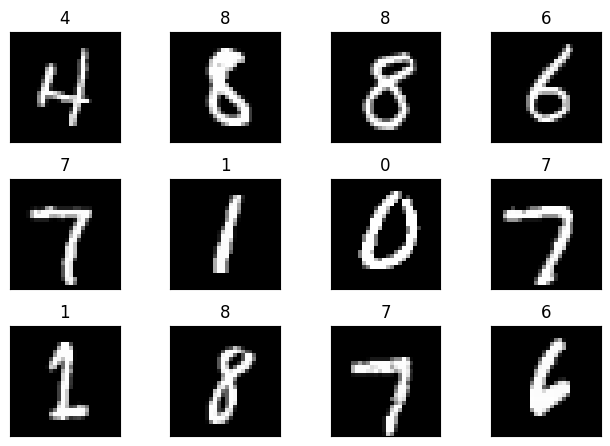

In [ ]:


view_data(train_loader)

## Final Basic Skeleton

In [ ]:
!pip install torchsummary
from torchsummary import summary

model = Model_7().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 14, 24, 24]           1,008
              ReLU-6           [-1, 14, 24, 24]               0
       BatchNorm2d-7           [-1, 14, 24, 24]              28
           Dropout-8           [-1, 14, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             140
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 14, 10, 10]           1,260
             ReLU-12           [-1, 14, 10, 10]               0
    

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0 #.05

model = Model_7(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_acc, train_losses)
  #scheduler.step()
  test(model, device, test_loader, test_acc, test_losses)


Epoch 1


Train: Loss=0.0996 Batch_id=117 Accuracy=85.17: 100%|██████████| 118/118 [00:21<00:00,  5.46it/s]


Test set: Average loss: 0.1631, Accuracy: 9509/10000 (95.09%)

Epoch 2


Train: Loss=0.0364 Batch_id=117 Accuracy=98.00: 100%|██████████| 118/118 [00:21<00:00,  5.46it/s]


Test set: Average loss: 0.0541, Accuracy: 9833/10000 (98.33%)

Epoch 3


Train: Loss=0.1695 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [00:21<00:00,  5.38it/s]


Test set: Average loss: 0.0441, Accuracy: 9854/10000 (98.54%)

Epoch 4


Train: Loss=0.0391 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:21<00:00,  5.48it/s]


Test set: Average loss: 0.0378, Accuracy: 9893/10000 (98.93%)

Epoch 5


Train: Loss=0.0258 Batch_id=117 Accuracy=99.02: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0381, Accuracy: 9889/10000 (98.89%)

Epoch 6


Train: Loss=0.0136 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [00:21<00:00,  5.60it/s]


Test set: Average loss: 0.0357, Accuracy: 9879/10000 (98.79%)

Epoch 7


Train: Loss=0.0276 Batch_id=117 Accuracy=99.21: 100%|██████████| 118/118 [00:20<00:00,  5.68it/s]


Test set: Average loss: 0.0299, Accuracy: 9908/10000 (99.08%)

Epoch 8


Train: Loss=0.0548 Batch_id=117 Accuracy=99.24: 100%|██████████| 118/118 [00:20<00:00,  5.70it/s]


Test set: Average loss: 0.0287, Accuracy: 9908/10000 (99.08%)

Epoch 9


Train: Loss=0.0077 Batch_id=117 Accuracy=99.28: 100%|██████████| 118/118 [00:20<00:00,  5.70it/s]


Test set: Average loss: 0.0318, Accuracy: 9897/10000 (98.97%)

Epoch 10


Train: Loss=0.0552 Batch_id=117 Accuracy=99.36: 100%|██████████| 118/118 [00:21<00:00,  5.49it/s]


Test set: Average loss: 0.0251, Accuracy: 9916/10000 (99.16%)

Epoch 11


Train: Loss=0.0032 Batch_id=117 Accuracy=99.43: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.0248, Accuracy: 9920/10000 (99.20%)

Epoch 12


Train: Loss=0.0199 Batch_id=117 Accuracy=99.53: 100%|██████████| 118/118 [00:21<00:00,  5.47it/s]


Test set: Average loss: 0.0271, Accuracy: 9926/10000 (99.26%)

Epoch 13


Train: Loss=0.0038 Batch_id=117 Accuracy=99.55: 100%|██████████| 118/118 [00:21<00:00,  5.45it/s]


Test set: Average loss: 0.0308, Accuracy: 9912/10000 (99.12%)

Epoch 14


Train: Loss=0.0014 Batch_id=117 Accuracy=99.59: 100%|██████████| 118/118 [00:21<00:00,  5.48it/s]


Test set: Average loss: 0.0259, Accuracy: 9917/10000 (99.17%)

Epoch 15


Train: Loss=0.0230 Batch_id=117 Accuracy=99.58: 100%|██████████| 118/118 [00:21<00:00,  5.39it/s]


Test set: Average loss: 0.0247, Accuracy: 9927/10000 (99.27%)



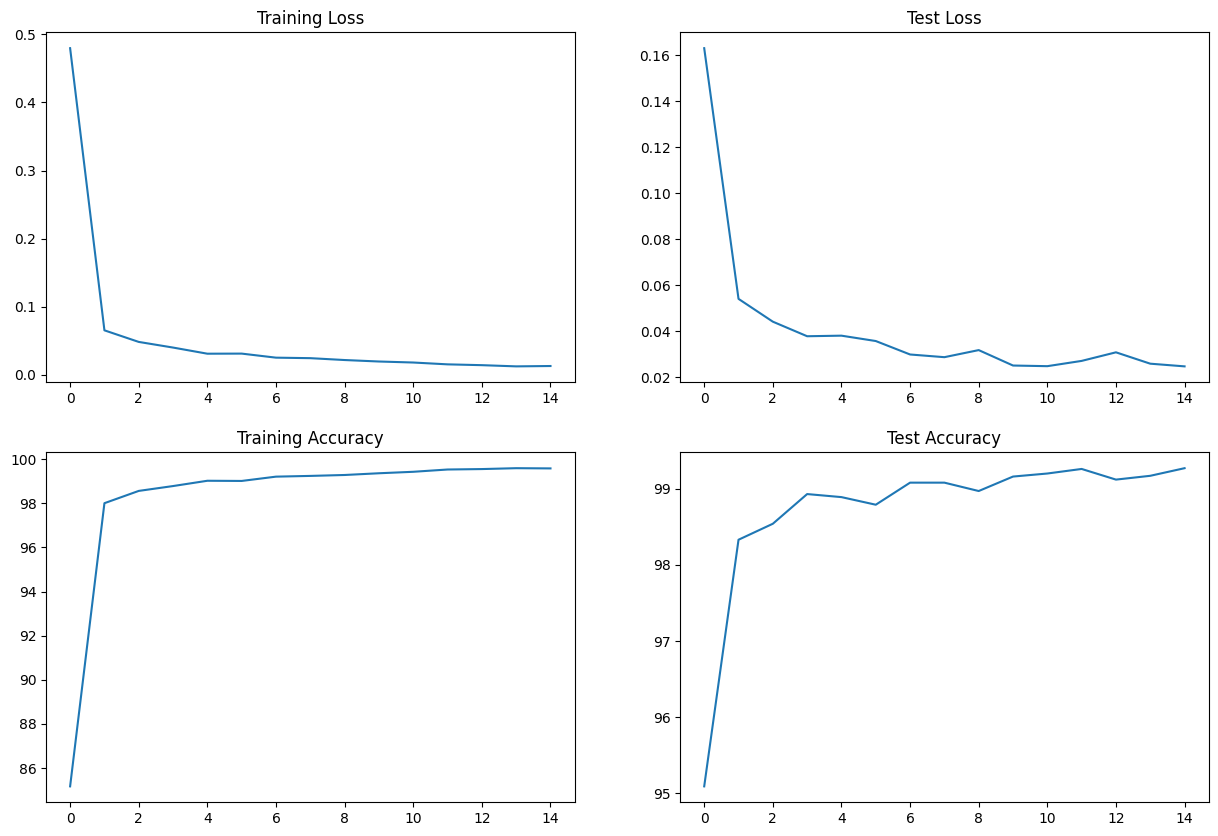

In [ ]:
vis_train_test_comp_graphs(train_losses, train_acc, test_losses, test_acc)

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0 #.05

model = Model_7(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_acc, train_losses)
  #scheduler.step()
  test(model, device, test_loader, test_acc, test_losses)


Epoch 1


Train: Loss=0.3715 Batch_id=117 Accuracy=62.69: 100%|██████████| 118/118 [00:22<00:00,  5.36it/s]


Test set: Average loss: 0.4115, Accuracy: 9057/10000 (90.57%)

Epoch 2


Train: Loss=0.1962 Batch_id=117 Accuracy=94.96: 100%|██████████| 118/118 [00:21<00:00,  5.61it/s]


Test set: Average loss: 0.1165, Accuracy: 9717/10000 (97.17%)

Epoch 3


Train: Loss=0.1388 Batch_id=117 Accuracy=97.25: 100%|██████████| 118/118 [00:20<00:00,  5.62it/s]


Test set: Average loss: 0.0937, Accuracy: 9751/10000 (97.51%)

Epoch 4


Train: Loss=0.1514 Batch_id=117 Accuracy=97.95: 100%|██████████| 118/118 [00:21<00:00,  5.57it/s]


Test set: Average loss: 0.0754, Accuracy: 9789/10000 (97.89%)

Epoch 5


Train: Loss=0.1189 Batch_id=117 Accuracy=98.22: 100%|██████████| 118/118 [00:21<00:00,  5.58it/s]


Test set: Average loss: 0.0776, Accuracy: 9777/10000 (97.77%)

Epoch 6


Train: Loss=0.0439 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [00:21<00:00,  5.57it/s]


Test set: Average loss: 0.0530, Accuracy: 9861/10000 (98.61%)

Epoch 7


Train: Loss=0.0370 Batch_id=117 Accuracy=98.65: 100%|██████████| 118/118 [00:20<00:00,  5.88it/s]


Test set: Average loss: 0.0502, Accuracy: 9862/10000 (98.62%)

Epoch 8


Train: Loss=0.0479 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:20<00:00,  5.89it/s]


Test set: Average loss: 0.0470, Accuracy: 9856/10000 (98.56%)

Epoch 9


Train: Loss=0.0396 Batch_id=117 Accuracy=98.86: 100%|██████████| 118/118 [00:20<00:00,  5.66it/s]


Test set: Average loss: 0.0392, Accuracy: 9879/10000 (98.79%)

Epoch 10


Train: Loss=0.0641 Batch_id=117 Accuracy=98.99: 100%|██████████| 118/118 [00:21<00:00,  5.61it/s]


Test set: Average loss: 0.0401, Accuracy: 9875/10000 (98.75%)

Epoch 11


Train: Loss=0.1004 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:20<00:00,  5.66it/s]


Test set: Average loss: 0.0396, Accuracy: 9865/10000 (98.65%)

Epoch 12


Train: Loss=0.0204 Batch_id=117 Accuracy=99.04: 100%|██████████| 118/118 [00:22<00:00,  5.34it/s]


Test set: Average loss: 0.0350, Accuracy: 9890/10000 (98.90%)

Epoch 13


Train: Loss=0.0389 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [00:21<00:00,  5.60it/s]


Test set: Average loss: 0.0337, Accuracy: 9894/10000 (98.94%)

Epoch 14


Train: Loss=0.0708 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:21<00:00,  5.58it/s]


Test set: Average loss: 0.0388, Accuracy: 9872/10000 (98.72%)

Epoch 15


Train: Loss=0.0312 Batch_id=117 Accuracy=99.22: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]


Test set: Average loss: 0.0338, Accuracy: 9899/10000 (98.99%)



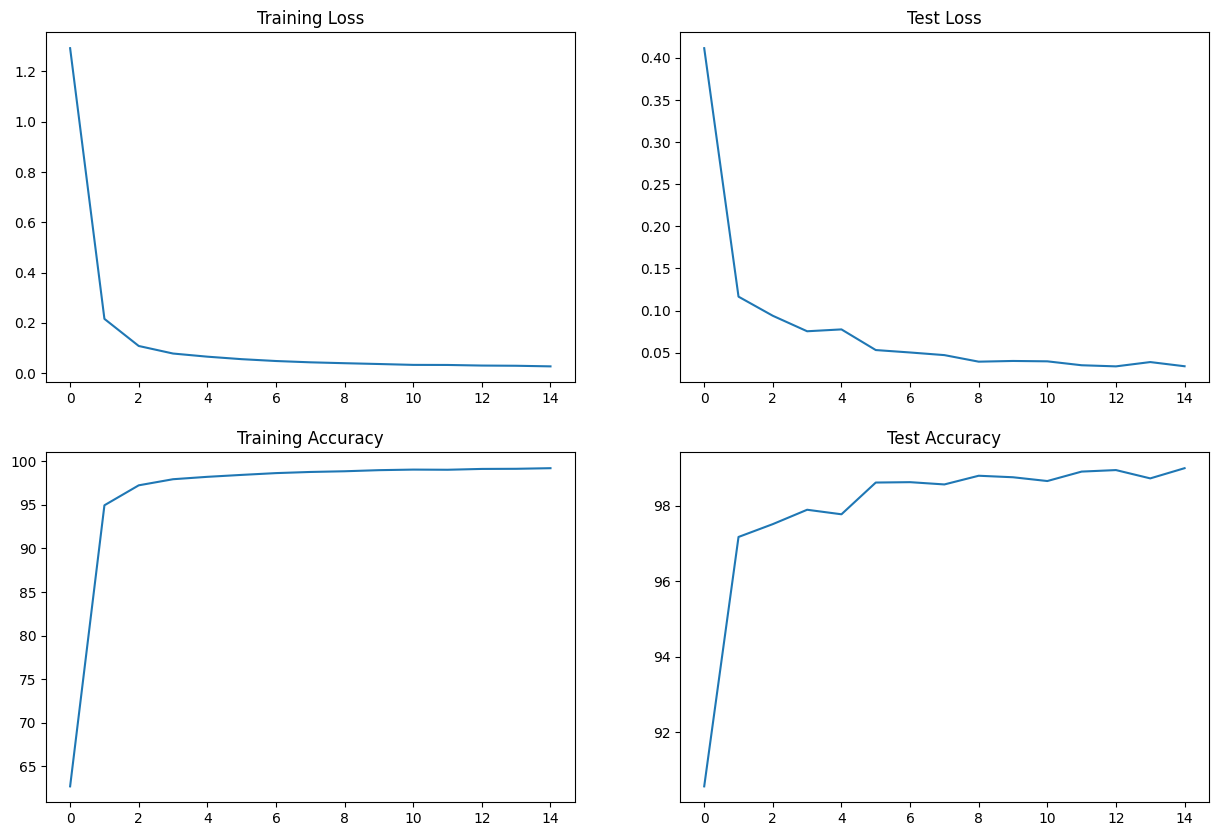

In [ ]:
vis_train_test_comp_graphs(train_losses, train_acc, test_losses, test_acc)

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0 #.05

model = Model_7(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1, verbose=True)
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_acc, train_losses)
  if epoch==4:
    scheduler.step()
  test(model, device, test_loader, test_acc, test_losses)


Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.0374 Batch_id=117 Accuracy=85.63: 100%|██████████| 118/118 [00:22<00:00,  5.32it/s]


Test set: Average loss: 0.1037, Accuracy: 9665/10000 (96.65%)

Epoch 2


Train: Loss=0.0681 Batch_id=117 Accuracy=98.17: 100%|██████████| 118/118 [00:21<00:00,  5.51it/s]


Test set: Average loss: 0.0510, Accuracy: 9845/10000 (98.45%)

Epoch 3


Train: Loss=0.0337 Batch_id=117 Accuracy=98.70: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]


Test set: Average loss: 0.0566, Accuracy: 9808/10000 (98.08%)

Epoch 4


Train: Loss=0.0147 Batch_id=117 Accuracy=98.95: 100%|██████████| 118/118 [00:20<00:00,  5.62it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0343, Accuracy: 9895/10000 (98.95%)

Epoch 5


Train: Loss=0.0299 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:20<00:00,  5.72it/s]


Test set: Average loss: 0.0287, Accuracy: 9905/10000 (99.05%)

Epoch 6


Train: Loss=0.0176 Batch_id=117 Accuracy=99.22: 100%|██████████| 118/118 [00:21<00:00,  5.50it/s]


Test set: Average loss: 0.0340, Accuracy: 9893/10000 (98.93%)

Epoch 7


Train: Loss=0.0766 Batch_id=117 Accuracy=99.30: 100%|██████████| 118/118 [00:21<00:00,  5.52it/s]


Test set: Average loss: 0.0248, Accuracy: 9923/10000 (99.23%)

Epoch 8


Train: Loss=0.0354 Batch_id=117 Accuracy=99.35: 100%|██████████| 118/118 [00:21<00:00,  5.49it/s]


Test set: Average loss: 0.0238, Accuracy: 9909/10000 (99.09%)

Epoch 9


Train: Loss=0.0780 Batch_id=117 Accuracy=99.43: 100%|██████████| 118/118 [00:21<00:00,  5.40it/s]


Test set: Average loss: 0.0298, Accuracy: 9904/10000 (99.04%)

Epoch 10


Train: Loss=0.0165 Batch_id=117 Accuracy=99.35: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0249, Accuracy: 9912/10000 (99.12%)

Epoch 11


Train: Loss=0.0061 Batch_id=117 Accuracy=99.49: 100%|██████████| 118/118 [00:21<00:00,  5.49it/s]


Test set: Average loss: 0.0224, Accuracy: 9924/10000 (99.24%)

Epoch 12


Train: Loss=0.0155 Batch_id=117 Accuracy=99.56: 100%|██████████| 118/118 [00:22<00:00,  5.27it/s]


Test set: Average loss: 0.0259, Accuracy: 9913/10000 (99.13%)

Epoch 13


Train: Loss=0.0122 Batch_id=117 Accuracy=99.61: 100%|██████████| 118/118 [00:21<00:00,  5.37it/s]


Test set: Average loss: 0.0270, Accuracy: 9909/10000 (99.09%)

Epoch 14


Train: Loss=0.0298 Batch_id=117 Accuracy=99.55: 100%|██████████| 118/118 [00:21<00:00,  5.50it/s]


Test set: Average loss: 0.0246, Accuracy: 9923/10000 (99.23%)

Epoch 15


Train: Loss=0.0038 Batch_id=117 Accuracy=99.63: 100%|██████████| 118/118 [00:20<00:00,  5.76it/s]


Test set: Average loss: 0.0214, Accuracy: 9933/10000 (99.33%)



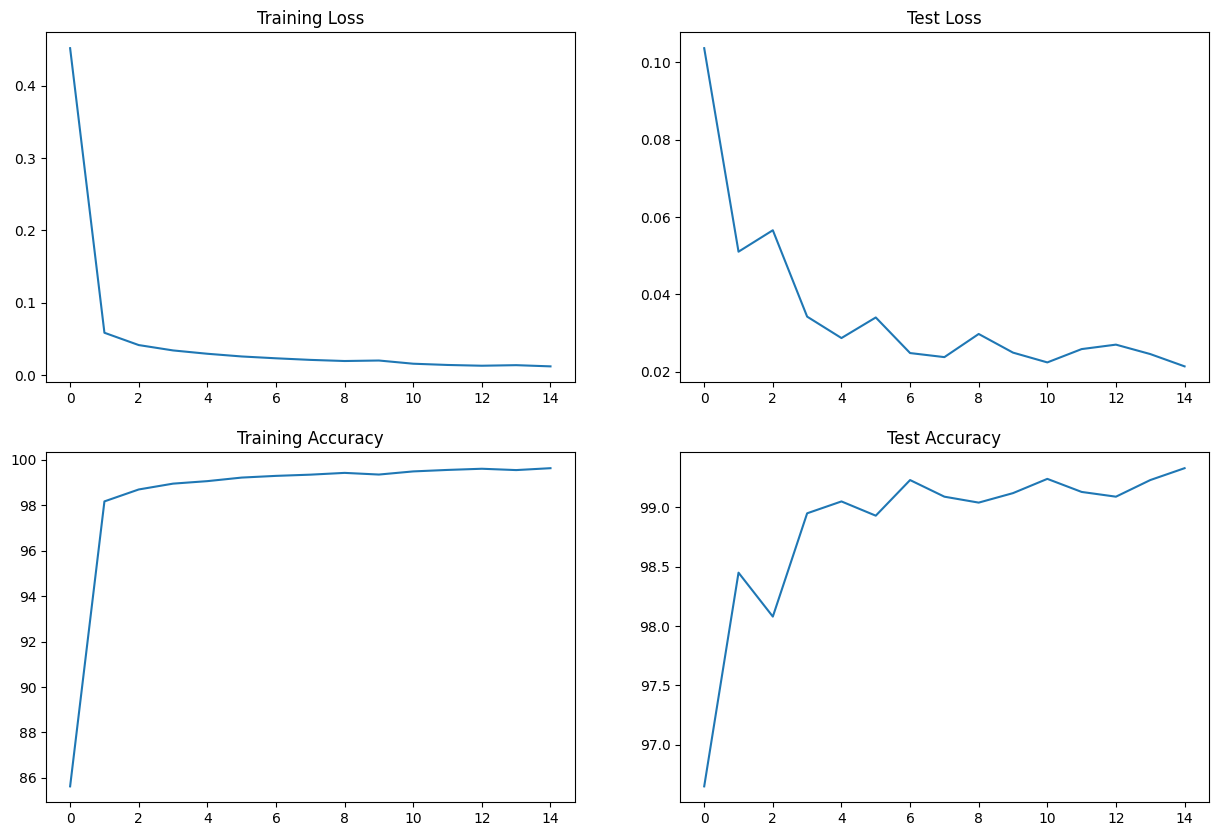

In [ ]:
vis_train_test_comp_graphs(train_losses, train_acc, test_losses, test_acc)

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0.05

model = Model_7(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1, verbose=True)
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_acc, train_losses)
  if epoch==4:
    scheduler.step()
  test(model, device, test_loader, test_acc, test_losses)


Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.0529 Batch_id=117 Accuracy=83.93: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.1039, Accuracy: 9660/10000 (96.60%)

Epoch 2


Train: Loss=0.0653 Batch_id=117 Accuracy=97.71: 100%|██████████| 118/118 [00:21<00:00,  5.56it/s]


Test set: Average loss: 0.0536, Accuracy: 9829/10000 (98.29%)

Epoch 3


Train: Loss=0.0636 Batch_id=117 Accuracy=98.32: 100%|██████████| 118/118 [00:20<00:00,  5.76it/s]


Test set: Average loss: 0.0429, Accuracy: 9852/10000 (98.52%)

Epoch 4


Train: Loss=0.0149 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [00:20<00:00,  5.71it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0340, Accuracy: 9892/10000 (98.92%)

Epoch 5


Train: Loss=0.0121 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:20<00:00,  5.70it/s]


Test set: Average loss: 0.0371, Accuracy: 9886/10000 (98.86%)

Epoch 6


Train: Loss=0.0132 Batch_id=117 Accuracy=98.88: 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]


Test set: Average loss: 0.0447, Accuracy: 9862/10000 (98.62%)

Epoch 7


Train: Loss=0.0055 Batch_id=117 Accuracy=98.94: 100%|██████████| 118/118 [00:21<00:00,  5.59it/s]


Test set: Average loss: 0.0287, Accuracy: 9901/10000 (99.01%)

Epoch 8


Train: Loss=0.0723 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:21<00:00,  5.48it/s]


Test set: Average loss: 0.0295, Accuracy: 9890/10000 (98.90%)

Epoch 9


Train: Loss=0.0614 Batch_id=117 Accuracy=99.02: 100%|██████████| 118/118 [00:21<00:00,  5.37it/s]


Test set: Average loss: 0.0257, Accuracy: 9903/10000 (99.03%)

Epoch 10


Train: Loss=0.0985 Batch_id=117 Accuracy=99.17: 100%|██████████| 118/118 [00:21<00:00,  5.39it/s]


Test set: Average loss: 0.0274, Accuracy: 9911/10000 (99.11%)

Epoch 11


Train: Loss=0.0045 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:21<00:00,  5.42it/s]


Test set: Average loss: 0.0269, Accuracy: 9903/10000 (99.03%)

Epoch 12


Train: Loss=0.0018 Batch_id=117 Accuracy=99.22: 100%|██████████| 118/118 [00:21<00:00,  5.47it/s]


Test set: Average loss: 0.0243, Accuracy: 9922/10000 (99.22%)

Epoch 13


Train: Loss=0.0066 Batch_id=117 Accuracy=99.26: 100%|██████████| 118/118 [00:21<00:00,  5.46it/s]


Test set: Average loss: 0.0346, Accuracy: 9878/10000 (98.78%)

Epoch 14


Train: Loss=0.0234 Batch_id=117 Accuracy=99.30: 100%|██████████| 118/118 [00:21<00:00,  5.51it/s]


Test set: Average loss: 0.0249, Accuracy: 9922/10000 (99.22%)

Epoch 15


Train: Loss=0.0281 Batch_id=117 Accuracy=99.28: 100%|██████████| 118/118 [00:21<00:00,  5.53it/s]


Test set: Average loss: 0.0275, Accuracy: 9916/10000 (99.16%)



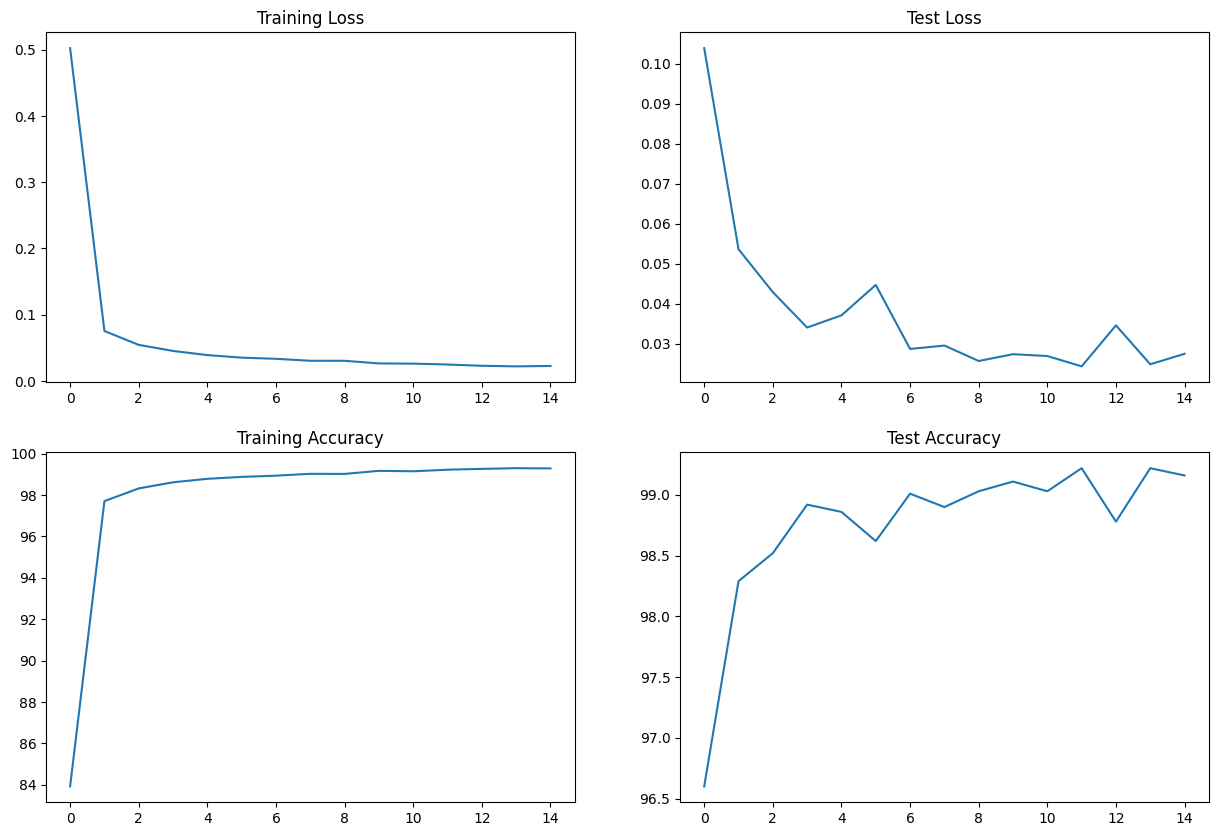

In [ ]:
vis_train_test_comp_graphs(train_losses, train_acc, test_losses, test_acc)

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    #transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.RandomAffine(degrees=20, translate=(0.1,0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

# set seed
torch.manual_seed(1)

batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
kwargs.update({'batch_size': batch_size, 'shuffle': True})

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0.05

model = Model_7(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1, verbose=True)
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_acc, train_losses)
  if epoch==4:
    scheduler.step()
  test(model, device, test_loader, test_acc, test_losses)


Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.0865 Batch_id=468 Accuracy=87.70: 100%|██████████| 469/469 [00:33<00:00, 13.98it/s]


Test set: Average loss: 0.0725, Accuracy: 9758/10000 (97.58%)

Epoch 2


Train: Loss=0.1077 Batch_id=468 Accuracy=96.29: 100%|██████████| 469/469 [00:31<00:00, 14.74it/s]


Test set: Average loss: 0.0454, Accuracy: 9842/10000 (98.42%)

Epoch 3


Train: Loss=0.1023 Batch_id=468 Accuracy=97.07: 100%|██████████| 469/469 [00:31<00:00, 14.85it/s]


Test set: Average loss: 0.0460, Accuracy: 9854/10000 (98.54%)

Epoch 4


Train: Loss=0.0671 Batch_id=468 Accuracy=97.35: 100%|██████████| 469/469 [00:30<00:00, 15.19it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0373, Accuracy: 9883/10000 (98.83%)

Epoch 5


Train: Loss=0.0174 Batch_id=468 Accuracy=97.54: 100%|██████████| 469/469 [00:32<00:00, 14.37it/s]


Test set: Average loss: 0.0314, Accuracy: 9906/10000 (99.06%)

Epoch 6


Train: Loss=0.0247 Batch_id=468 Accuracy=97.74: 100%|██████████| 469/469 [00:32<00:00, 14.53it/s]


Test set: Average loss: 0.0388, Accuracy: 9870/10000 (98.70%)

Epoch 7


Train: Loss=0.0542 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:31<00:00, 14.94it/s]


Test set: Average loss: 0.0265, Accuracy: 9917/10000 (99.17%)

Epoch 8


Train: Loss=0.0522 Batch_id=468 Accuracy=97.87: 100%|██████████| 469/469 [00:31<00:00, 15.08it/s]


Test set: Average loss: 0.0378, Accuracy: 9879/10000 (98.79%)

Epoch 9


Train: Loss=0.0476 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:33<00:00, 14.14it/s]


Test set: Average loss: 0.0270, Accuracy: 9910/10000 (99.10%)

Epoch 10


Train: Loss=0.0584 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:32<00:00, 14.65it/s]


Test set: Average loss: 0.0248, Accuracy: 9923/10000 (99.23%)

Epoch 11


Train: Loss=0.0141 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:31<00:00, 15.03it/s]


Test set: Average loss: 0.0264, Accuracy: 9925/10000 (99.25%)

Epoch 12


Train: Loss=0.1363 Batch_id=468 Accuracy=98.16: 100%|██████████| 469/469 [00:31<00:00, 14.87it/s]


Test set: Average loss: 0.0216, Accuracy: 9931/10000 (99.31%)

Epoch 13


Train: Loss=0.0790 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:32<00:00, 14.27it/s]


Test set: Average loss: 0.0237, Accuracy: 9925/10000 (99.25%)

Epoch 14


Train: Loss=0.0095 Batch_id=468 Accuracy=98.21: 100%|██████████| 469/469 [00:31<00:00, 14.98it/s]


Test set: Average loss: 0.0288, Accuracy: 9903/10000 (99.03%)

Epoch 15


Train: Loss=0.0664 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:31<00:00, 15.08it/s]


Test set: Average loss: 0.0273, Accuracy: 9912/10000 (99.12%)



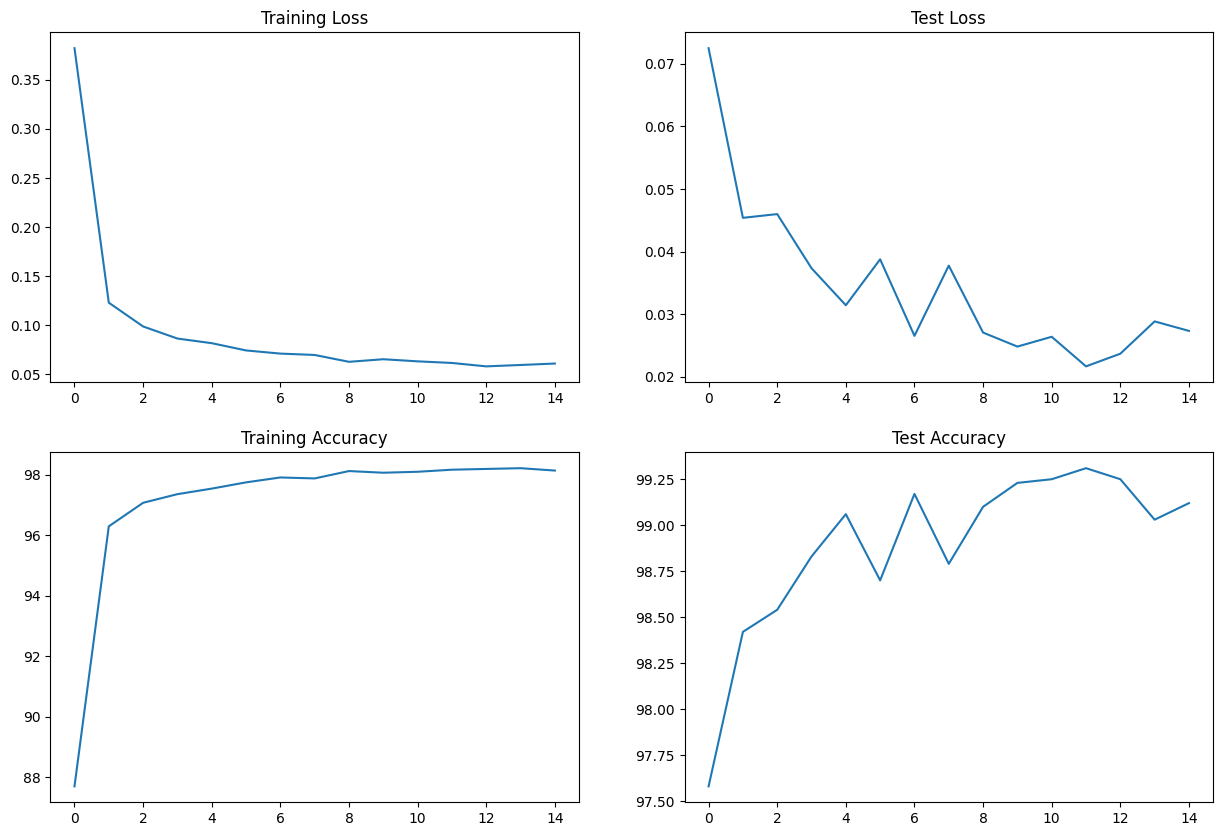

In [ ]:
vis_train_test_comp_graphs(train_losses, train_acc, test_losses, test_acc)

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0.05

model = Model_7(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1, verbose=True)
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_acc, train_losses)
  scheduler.step()
  test(model, device, test_loader, test_acc, test_losses)


Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.1322 Batch_id=468 Accuracy=89.18: 100%|██████████| 469/469 [00:32<00:00, 14.39it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0502, Accuracy: 9838/10000 (98.38%)

Epoch 2


Train: Loss=0.1159 Batch_id=468 Accuracy=96.72: 100%|██████████| 469/469 [00:31<00:00, 14.85it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0327, Accuracy: 9890/10000 (98.90%)

Epoch 3


Train: Loss=0.0532 Batch_id=468 Accuracy=97.26: 100%|██████████| 469/469 [00:33<00:00, 14.17it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0286, Accuracy: 9917/10000 (99.17%)

Epoch 4


Train: Loss=0.0535 Batch_id=468 Accuracy=97.46: 100%|██████████| 469/469 [00:33<00:00, 13.80it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0318, Accuracy: 9899/10000 (98.99%)

Epoch 5


Train: Loss=0.1066 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:32<00:00, 14.22it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0202, Accuracy: 9933/10000 (99.33%)

Epoch 6


Train: Loss=0.0813 Batch_id=468 Accuracy=98.30: 100%|██████████| 469/469 [00:32<00:00, 14.54it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0199, Accuracy: 9935/10000 (99.35%)

Epoch 7


Train: Loss=0.0108 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:32<00:00, 14.34it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0200, Accuracy: 9934/10000 (99.34%)

Epoch 8


Train: Loss=0.0686 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:34<00:00, 13.68it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0189, Accuracy: 9937/10000 (99.37%)

Epoch 9


Train: Loss=0.0230 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:32<00:00, 14.25it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0193, Accuracy: 9936/10000 (99.36%)

Epoch 10


Train: Loss=0.0431 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:31<00:00, 14.76it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0197, Accuracy: 9932/10000 (99.32%)

Epoch 11


Train: Loss=0.0999 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:31<00:00, 14.85it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0190, Accuracy: 9936/10000 (99.36%)

Epoch 12


Train: Loss=0.1079 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:33<00:00, 14.07it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Test set: Average loss: 0.0188, Accuracy: 9938/10000 (99.38%)

Epoch 13


Train: Loss=0.0809 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:32<00:00, 14.48it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Test set: Average loss: 0.0196, Accuracy: 9935/10000 (99.35%)

Epoch 14


Train: Loss=0.0260 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:31<00:00, 14.93it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Test set: Average loss: 0.0189, Accuracy: 9937/10000 (99.37%)

Epoch 15


Train: Loss=0.0853 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:31<00:00, 15.00it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Test set: Average loss: 0.0198, Accuracy: 9933/10000 (99.33%)



In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    #transforms.RandomApply([transforms.CenterCrop(20), ], p=0.1),
    transforms.RandomAffine(degrees=20, translate=(0.1,0.1), scale=(0.9, 1.1)),
    #transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

# set seed
torch.manual_seed(1)

batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
kwargs.update({'batch_size': batch_size, 'shuffle': True})

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0.05

model = Model_7(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1, verbose=True)
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_acc, train_losses)
  scheduler.step()
  test(model, device, test_loader, test_acc, test_losses)


Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.1683 Batch_id=302 Accuracy=83.74:  65%|██████▍   | 303/469 [00:18<00:12, 13.39it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f9731296950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f9731296950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/

Adjusting learning rate of group 0 to 1.0000e-01.
Test set: Average loss: 0.0524, Accuracy: 9825/10000 (98.25%)

Epoch 2


Train: Loss=0.1939 Batch_id=207 Accuracy=95.87:  44%|████▍     | 207/469 [00:11<00:20, 13.09it/s]

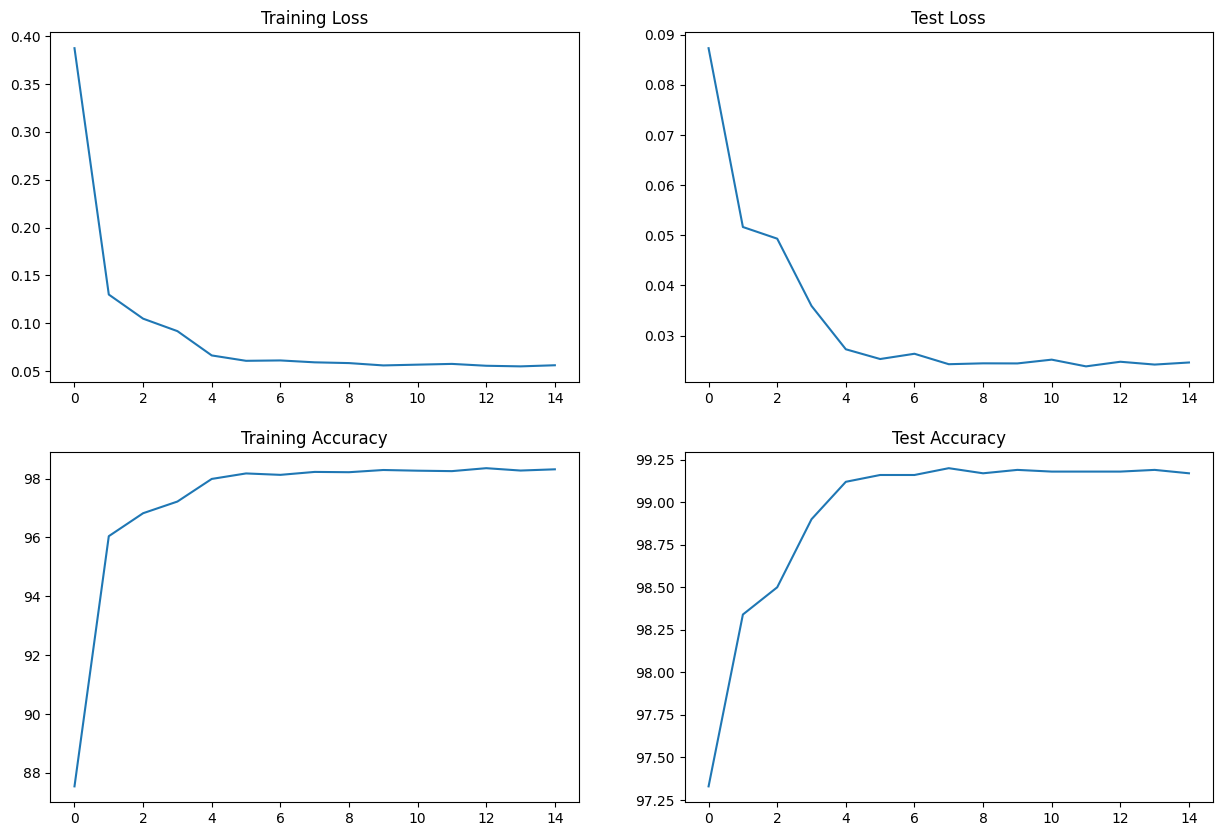

In [ ]:
vis_train_test_comp_graphs(train_losses, train_acc, test_losses, test_acc)